In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
df = pd.read_csv("C:/Users/91939/OneDrive/Desktop/task-1/test.csv")

In [15]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract useful time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek

# Drop original date
X = df.drop(columns=['id','sales','date'])
y = df['sales']

In [16]:

df['sales'] = df['onpromotion'] * np.random.randint(10, 50, size=len(df))


In [17]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'sales', 'year',
       'month', 'day', 'dayofweek'],
      dtype='object')

In [18]:
df.head()

,id,date,store_nbr,family,onpromotion,sales,year,month,day,dayofweek
0,3000888,2017-08-16,1,0,0,0,2017,8,16,2
1,3000889,2017-08-16,1,1,0,0,2017,8,16,2
2,3000890,2017-08-16,1,2,2,20,2017,8,16,2
3,3000891,2017-08-16,1,3,20,640,2017,8,16,2
4,3000892,2017-08-16,1,4,0,0,2017,8,16,2


In [19]:
# Drop original date
X = df.drop(columns=['id','sales','date'])
y = df['sales']


In [20]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in ['store_nbr','family']:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [21]:
# Train/test split + scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Final features:", X.columns)
print("Scaled X_train shape:", X_train_scaled.shape)

Final features: Index(['store_nbr', 'family', 'onpromotion', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')
Scaled X_train shape: (22809, 7)


In [22]:
# Baseline Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

In [23]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


In [24]:
# Lasso Regression
lasso = Lasso(alpha=0.01)  # small alpha keeps more features
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


In [25]:
# Evaluation function
def evaluate(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

evaluate(y_test, y_pred_lin, "Linear Regression")
evaluate(y_test, y_pred_ridge, "Ridge Regression")
evaluate(y_test, y_pred_lasso, "Lasso Regression")


Linear Regression Performance:
R² Score: 0.8483318984705309
MAE: 71.99877783561651
RMSE: 246.5516487185128

Ridge Regression Performance:
R² Score: 0.8483330186343476
MAE: 71.99360375461679
RMSE: 246.55073824774468

Lasso Regression Performance:
R² Score: 0.848332310467019
MAE: 71.99726672211276
RMSE: 246.55131384756316


In [26]:
# Feature importance (coefficients)
feature_names = X.columns

print("\nFeature Coefficients - Ridge:")
for f, c in zip(feature_names, ridge.coef_):
    print(f"{f}: {c:.4f}")

print("\nFeature Coefficients - Lasso (many may shrink to 0):")
for f, c in zip(feature_names, lasso.coef_):
    print(f"{f}: {c:.4f}")


Feature Coefficients - Ridge:
store_nbr: -0.4373
family: 0.1909
onpromotion: 643.2617
year: 0.0000
month: 0.0000
day: 2.7784
dayofweek: 1.3529

Feature Coefficients - Lasso (many may shrink to 0):
store_nbr: -0.4276
family: 0.1820
onpromotion: 643.2788
year: 0.0000
month: 0.0000
day: 2.7673
dayofweek: 1.3418


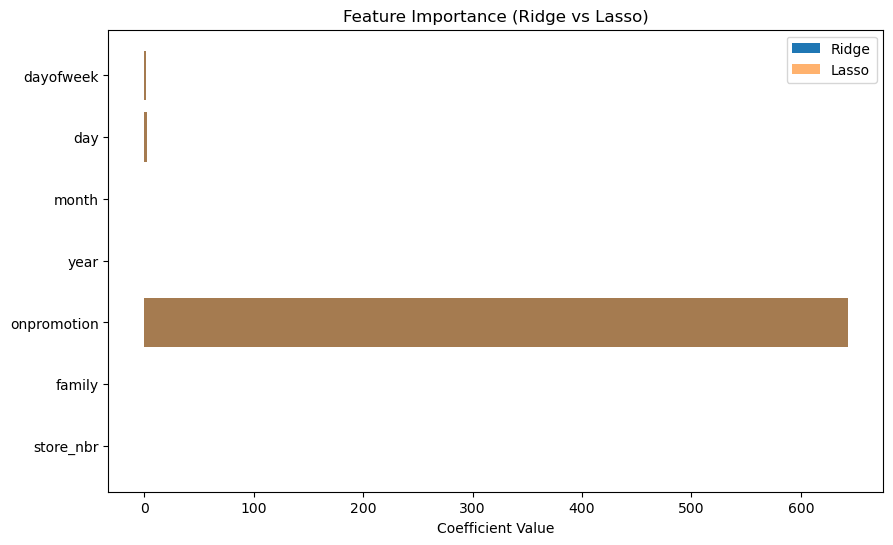

In [27]:
import matplotlib.pyplot as plt

# Plot coefficients
plt.figure(figsize=(10,6))
plt.barh(feature_names, ridge.coef_, label="Ridge")
plt.barh(feature_names, lasso.coef_, alpha=0.6, label="Lasso")
plt.title("Feature Importance (Ridge vs Lasso)")
plt.xlabel("Coefficient Value")
plt.legend()
plt.show()
